## Generate Heatmaps

Load the logged performance map and regenerate the heatmaps for all experiments.

In [1]:
import os

import numpy as np

from tqdm import tqdm
from pathlib import Path
from map_elites.plot_utils import plot_heatmap

In [2]:
def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

In [3]:
logdir_path = "log/complete_logs/"

Heatmaps generated:  15%|█▍        | 394/2700 [24:05<2:19:44,  3.64s/it]


SystemError: <built-in method write of _io.BufferedWriter object at 0x7500d5308> returned a result with an error set

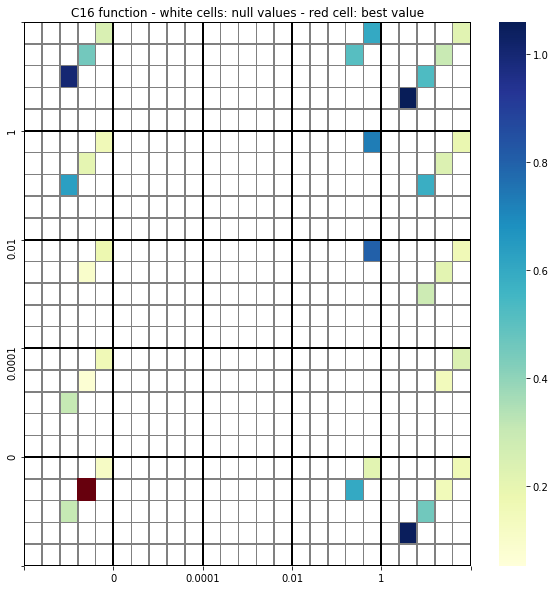

In [5]:
logdir = Path(logdir_path)
ft_bins = ["-inf", "0", "0.0001", "0.01", "1", "inf"]
steps = 6 * 18 * 25
with tqdm(total=steps, desc="Heatmaps generated") as pbar:
    # loop through experiments
    for e in sorted(listdir_nohidden(logdir)):
#         print(e)
        # loop through functions
        for c in sorted(listdir_nohidden(logdir / e)):
#             print(f"\t{c}")
            # loop through runs
            for r in listdir_nohidden(logdir / e / c):
                if r == "plots":
                    continue
                p = np.load(logdir / e / c / r / "performances.npy")

                if len(p.shape) == 1:
                    y_ax = ["-"]
                    x_ax = ft_bins
                else:
                    x_ax = ft_bins
                    y_ax = ft_bins

                # remove previous plots
                try:
                    os.remove(logdir / e / c / r / "heatmap.png")
                    os.remove(logdir / e / c / r / "heatmap.pdf")
                except OSError:
                    pass
                # generate new heatmaps
                plot_heatmap(p, x_ax, y_ax, savefig_path=(logdir / e / c / r), title=f"{c} function", interactive=False, plot_annotations=False)
                pbar.update(1)